In [ ]:
import pandas as pd

df = pd.read_csv("dataset.csv")

print(df.head())

# shape (rows + columns)
print("Shape:", df.shape)

# column info
print(df.info())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>


In [361]:
# Dropping the ID column, it is useless in prediction
df = df.drop(columns=["id"])

In [362]:
"""
There are total 5110 rows (Entries). All the features does not have any missing
values except BMI. From the df.info we see that there are 4909 BMI non-null values.

Missing BMI = 5110 − 4909 = 201

I will Fill the missing BMI columns with the median of the BMI.
"""

df["bmi"] = df["bmi"].fillna(df["bmi"].median())
print("Missing BMI values filled with mean: ", df["bmi"].median())


Missing BMI values filled with mean:  28.1


In [363]:
import numpy as np

def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

bmi_outliers = detect_outliers("bmi")
glucose_outliers = detect_outliers("avg_glucose_level")

print("BMI Outliers:", len(bmi_outliers))
print("Glucose Outliers:", len(glucose_outliers))

BMI Outliers: 126
Glucose Outliers: 627


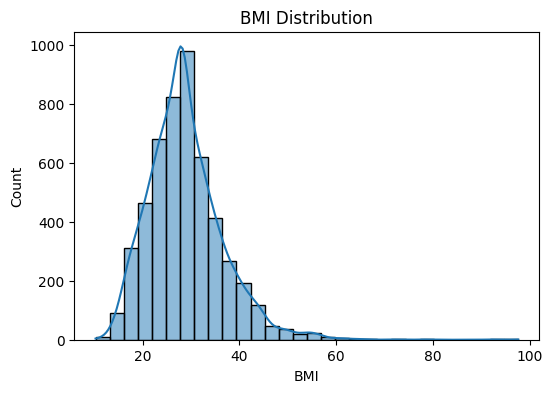

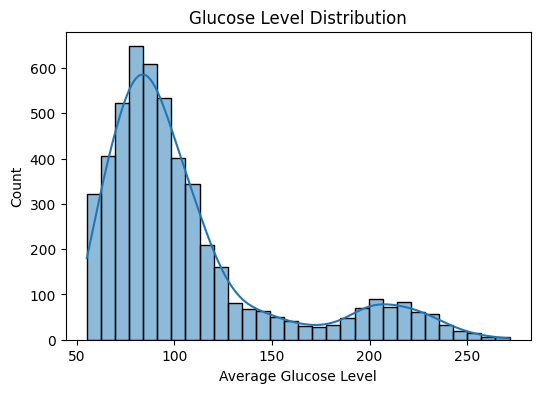

In [364]:
# Visualizing BMI And Glucose distribution to observe outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df["bmi"], kde=True, bins=30)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["avg_glucose_level"], kde=True, bins=30)
plt.title("Glucose Level Distribution")
plt.xlabel("Average Glucose Level")
plt.show()


In [365]:
"""
Since I have so many outliers (126 in BMI and 627 in Glucose), I replaced
them with the mean of their respective column.
"""

df.loc[bmi_outliers.index, "bmi"] = df["bmi"].median()

df.loc[glucose_outliers.index, "avg_glucose_level"] = df["avg_glucose_level"].median()

print("Outliers updated Successsfully!")


Outliers updated Successsfully!


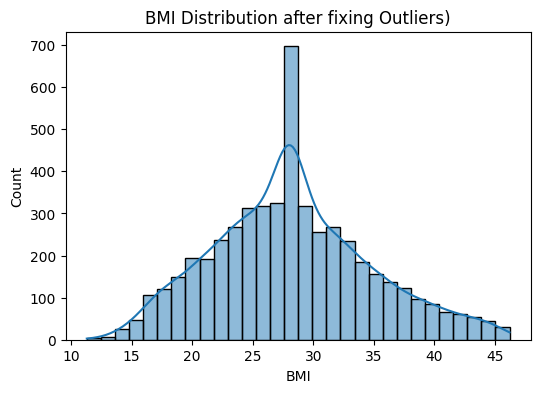

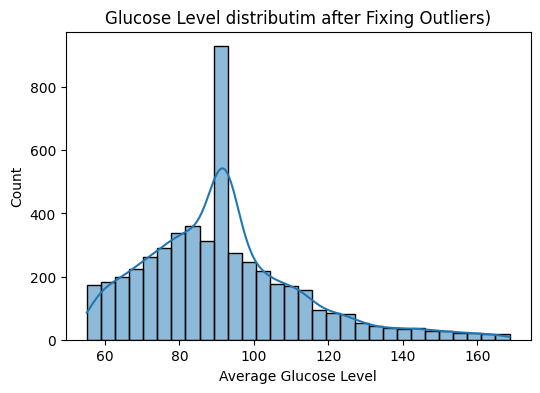

In [366]:
# Visualixing after fixing outliers

plt.figure(figsize=(6,4))
sns.histplot(df["bmi"], kde=True, bins=30)
plt.title("BMI Distribution after fixing Outliers)")
plt.xlabel("BMI")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["avg_glucose_level"], kde=True, bins=30)
plt.title("Glucose Level distributim after Fixing Outliers)")
plt.xlabel("Average Glucose Level")
plt.show()

In [367]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,91.490283,28.248689,0.048728
std,22.612647,0.296607,0.226063,21.201454,6.547276,0.215320
min,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.882500,28.100000,0.000000
75%,61.000000,0.000000,0.000000,101.295000,32.200000,0.000000
max,82.000000,1.000000,1.000000,168.680000,46.200000,1.000000


In [368]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,91.885,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,91.885,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.920,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,91.885,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,91.885,24.0,never smoked,1


In [369]:
print(df["gender"].unique())

['Male' 'Female' 'Other']


In [370]:
# Encoding categorial variables

categorical_columns = [
    'gender',
    'ever_married',
    'work_type',
    'Residence_type',
    'smoking_status'
]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df.head())
print("Shape:", df.shape)

    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             91.885  36.6       1   
1  61.0             0              0             91.885  28.1       1   
2  80.0             0              1            105.920  32.5       1   
3  49.0             0              0             91.885  34.4       1   
4  79.0             1              0             91.885  24.0       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0         True         False              True                   False   
1        False         False              True                   False   
2         True         False              True                   False   
3        False         False              True                   False   
4        False         False              True                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False  

In [371]:
# Changing bolean values to binarty
df = df.astype(int)

print(df.head())
print("New shape:", df.shape)

   age  hypertension  heart_disease  avg_glucose_level  bmi  stroke  \
0   67             0              1                 91   36       1   
1   61             0              0                 91   28       1   
2   80             0              1                105   32       1   
3   49             0              0                 91   34       1   
4   79             1              0                 91   24       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0            1             0                 1                       0   
1            0             0                 1                       0   
2            1             0                 1                       0   
3            0             0                 1                       0   
4            0             0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0              

In [372]:
"""
normalized age, BMI, and glucose using StandardScaler so all numerical features
have mean 0 and standard deviation 1.  This helps the neural network train more efficiently
and prevents one large-scale feature from dominating others.
"""

# Normalizeing  age, BMI, and glucose using StandardScaler

from sklearn.preprocessing import StandardScaler

# Columns to scale
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())
print("\n _________ \n", df[numeric_cols].describe())


        age  hypertension  heart_disease  avg_glucose_level       bmi  stroke  \
0  1.050950             0              1           0.002049  1.249392       1   
1  0.785835             0              0           0.002049  0.026328       1   
2  1.625367             0              1           0.662198  0.637860       1   
3  0.255604             0              0           0.002049  0.943626       1   
4  1.581181             1              0           0.002049 -0.585204       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0            1             0                 1                       0   
1            0             0                 1                       0   
2            1             0                 1                       0   
3            0             0                 1                       0   
4            0             0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \

In [373]:
# Splitting dataset into x(features) and y(target)
x = df.drop(columns=["stroke"])
y = df["stroke"]

print("X shape:", x.shape)
print("y shape:", y.shape)


X shape: (5110, 16)
y shape: (5110,)


In [374]:
# Train/Test Split
# 80% training and 20% test

from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y
)

print("X_train: ", X_train.shape)
print("x_test:  ", X_test.shape)


X_train:  (4088, 16)
x_test:   (1022, 16)


In [375]:
# Apply SMOTE to fix data imbalance

from imblearn.over_sampling import SMOTE

# Initialize SMOTE (random_state ensures reproducibility)
smote = SMOTE(random_state=42)

# Apply SMOTE only to the training data (X_train, y_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original Training Set Distribution:")
print(y_train.value_counts())
print("\nResampled Training Set Distribution (Should be balanced):")
print(y_train_resampled.value_counts())

Original Training Set Distribution:
stroke
0    3889
1     199
Name: count, dtype: int64

Resampled Training Set Distribution (Should be balanced):
stroke
0    3889
1    3889
Name: count, dtype: int64


In [376]:
input_dim = X_train.shape[1]
print("Number of input features:", input_dim)


Number of input features: 16


In [377]:
# Building the model

from tensorflow import keras
from tensorflow.keras import layers

model_resampled = keras.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dropout(0.2),                   # Special layer (regularization)
    layers.Dense(1, activation="sigmoid")
])

In [378]:
# Compiling
from tensorflow.keras.metrics import Recall, Precision

model_resampled.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    
    metrics=[
        'accuracy',
        Recall(name='recall'),
        Precision(name='precision')
    ]
)

In [379]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [380]:
# Training
history = model_resampled.fit(
    X_train_resampled, 
    y_train_resampled,
    
    batch_size=32,
    epochs=40,
    validation_data=(X_test, y_test), 
    
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7708 - loss: 0.5090 - precision: 0.7194 - recall: 0.8879 - val_accuracy: 0.7329 - val_loss: 0.4661 - val_precision: 0.1320 - val_recall: 0.8000
Epoch 2/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8311 - loss: 0.4085 - precision: 0.7829 - recall: 0.9162 - val_accuracy: 0.7260 - val_loss: 0.4896 - val_precision: 0.1192 - val_recall: 0.7200
Epoch 3/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8453 - loss: 0.3782 - precision: 0.7998 - recall: 0.9213 - val_accuracy: 0.7544 - val_loss: 0.4589 - val_precision: 0.1264 - val_recall: 0.6800
Epoch 4/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8569 - loss: 0.3554 - precision: 0.8104 - recall: 0.9319 - val_accuracy: 0.7613 - val_loss: 0.4697 - val_precision: 0.1298 - val_recall: 0.6800
Epoch 5/40
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8645 - loss: 0.3401 - precision: 0.8198 - recall: 0.9344 - val_accuracy: 0.7759 - val_loss: 0.

In [381]:
loss, accuracy, recall, precision = model_resampled.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test Precision: {precision:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8063 - loss: 0.3727 - precision: 0.1300 - recall: 0.5200       
Test Accuracy: 0.8063
Test Recall: 0.5200
Test Precision: 0.1300


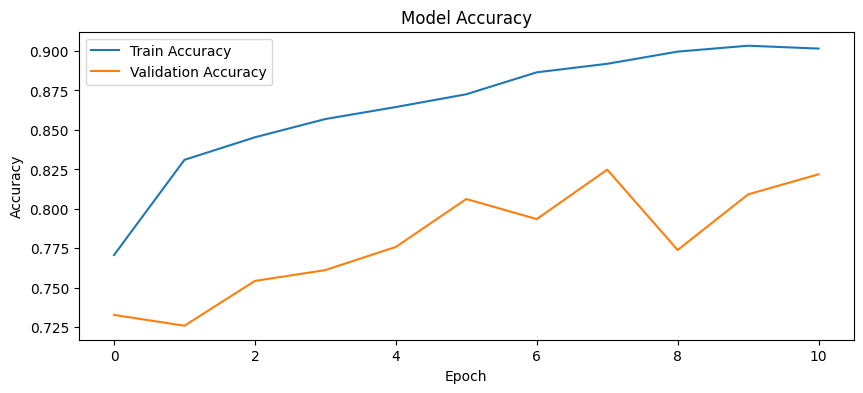

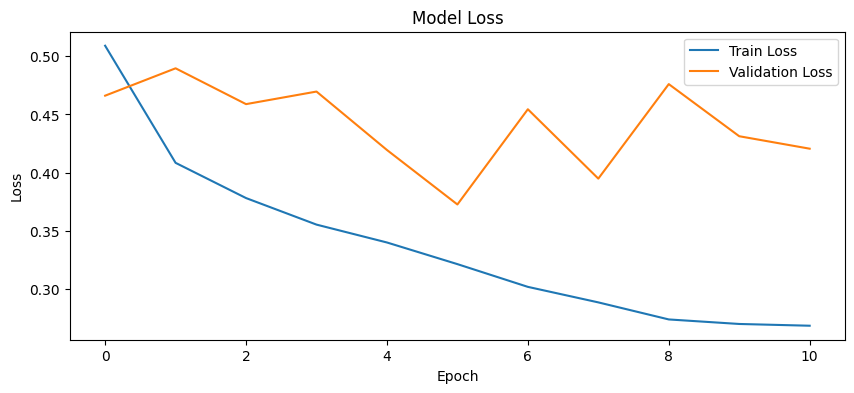

In [382]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


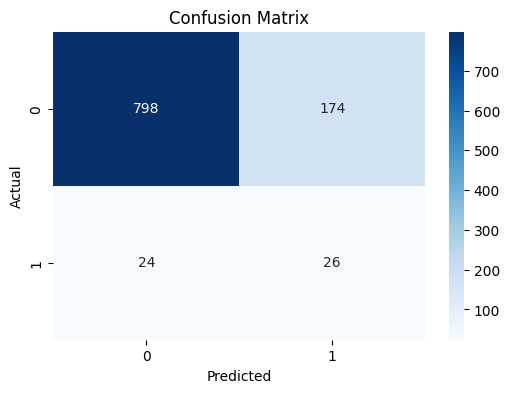

In [385]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_prob = model_resampled.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [386]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       972
           1       0.13      0.52      0.21        50

    accuracy                           0.81      1022
   macro avg       0.55      0.67      0.55      1022
weighted avg       0.93      0.81      0.86      1022

